#   Figures for Multi-Lateral Surgical Pattern Cutting With Deep Tensioning Policies

##### Authors: Brijen Thananjeyan, Animesh Garg, Sanjay Krishnan, Carolyn Chen, Ken Goldberg

In [439]:
# Environment setup

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys, pickle, os
import pandas as pd
from scipy import stats
from sympy import latex
from pandas import DataFrame
from matplotlib import font_manager, rcParams
from registration import *
from shapecloth import *
from cloth import *
from pattern_designer import *

dir_figs = './figures/'
dir_pts  = './pt_files/'
dir_data = './sim_files/'

rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 12})
fprop = font_manager.FontProperties(fname='/Library/Fonts/Microsoft/Gill Sans MT.ttf') 

colors = ['#00ff99','#0099ff','#ffcc00','#ff5050','#9900cc','#5050ff','#99cccc','#0de4f6', '#e04e39']
markers = ['s-', 'o-', '^-', 'v-', 'x-', 'h-']

## Shapes

##### Visualize the 21 different shapes and curves for which we ran simulations on

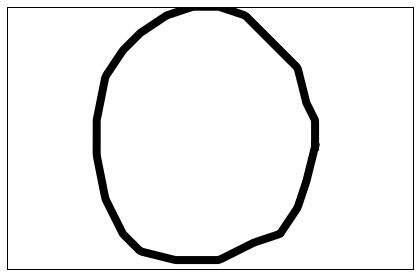

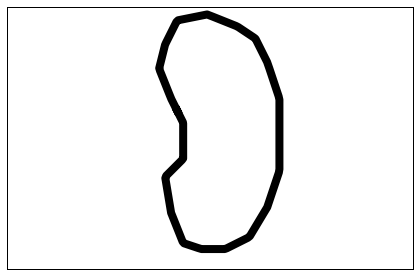

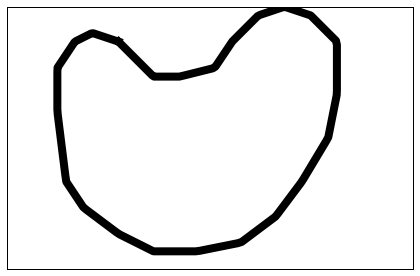

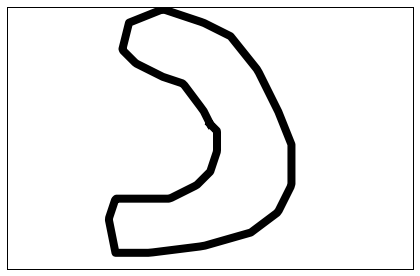

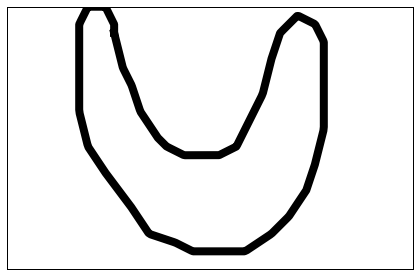

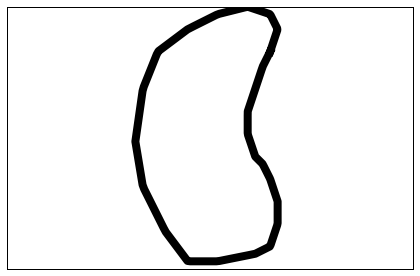

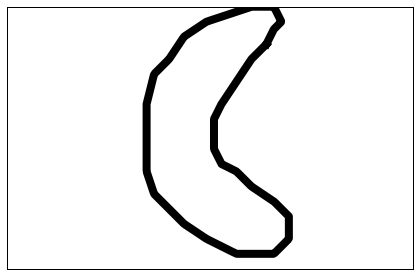

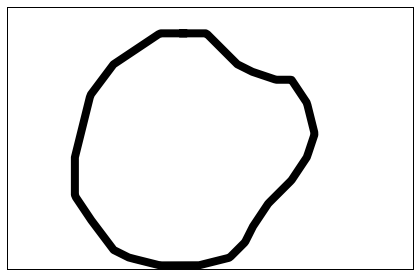

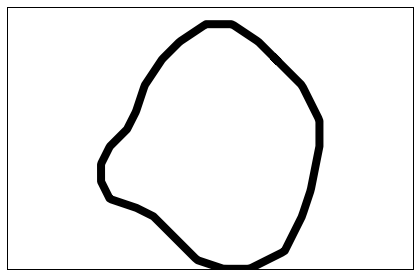

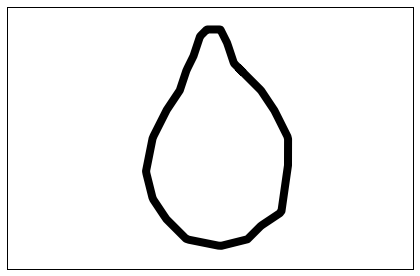

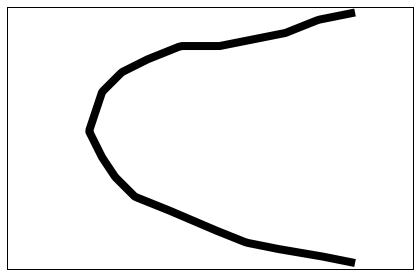

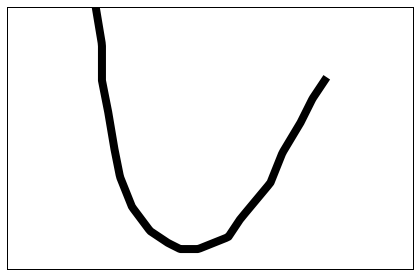

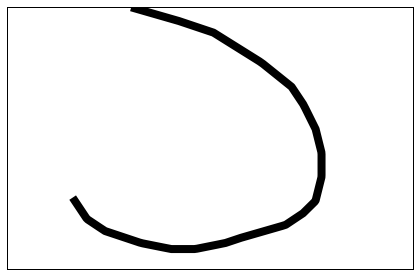

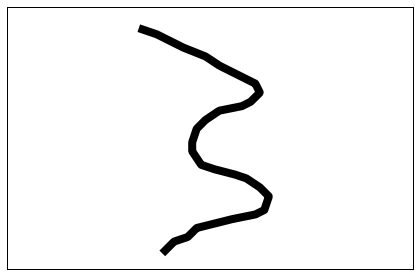

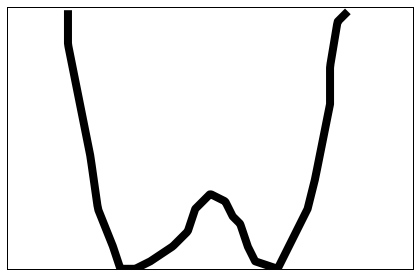

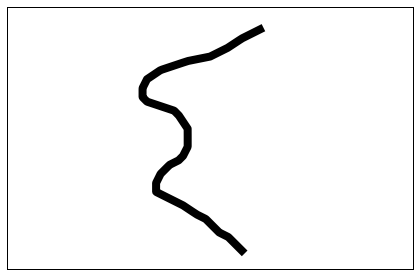

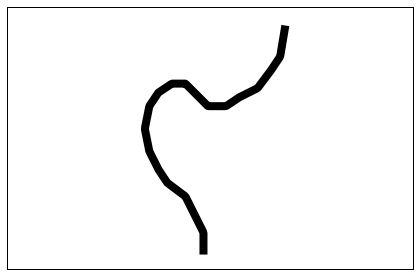

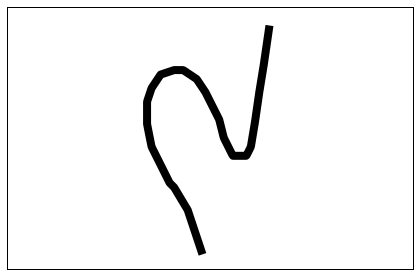

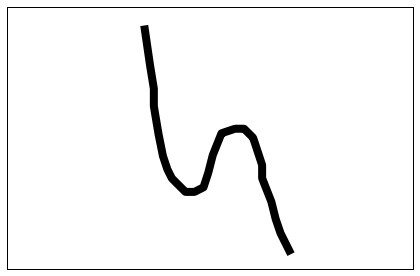

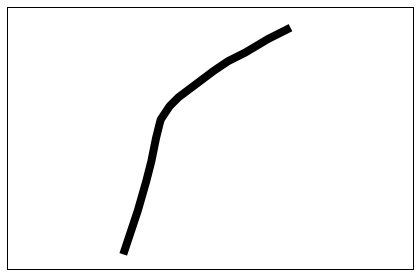

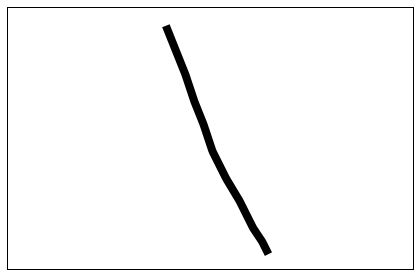

In [483]:
def vis_shape(corners, points, filename, savefig=True):
    trajectory = np.asarray(get_trajectory(corners, pts, True))
    plt.plot(trajectory[:,0], trajectory[:,1] , color='k', alpha=1.0, linewidth=8.0)
    plt.axis('equal')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    if savefig == True:
        plt.savefig(dir_figs+filename+'.svg', format='svg', facecolor='w', edgecolor='w')
        plt.savefig(dir_figs+filename+'.png', format='png', facecolor='w', edgecolor='w')

    plt.show()

num_shapes = 21
pd = PatternDesigner()
for i in range(1, num_shapes+1):
    filename = 'pts_%d' %(i)
    pd.load_pts(filename)
    corners = pd.corners
    pts = pd.trajectory
    vis_shape(corners, pts, filename)

## Accuracy accuracy for no-hold, hold, and tension phases per shape

##### Let symmetric difference score be $S_{mode}$ for $mode \in \{ \text{nohold}, \text{hold}, \text{tension} \}$
##### Percentage scores are calculated by calculating $\frac{(S_{mode} - S_{nohold})}{S_{nohold}}$ where $S_{nohold}$ is regarded as the baseline performance
##### We report two average mean percentage scores for each of the 21 shapes: 2) cutting with passive grasping, and 3) cutting with active tensioning

In [482]:
num_shapes = 21
index = []
scores = [['' for x in range(3)] for y in range(21)] 

for i in range(1, num_shapes+1):
    filename = 'pts_%d' %(i)
    filepath = dir_data + filename
    # only cutting
    d = pickle.load(open(filepath+"/noholds", "rb"))
    score_nohold = np.mean(d['scores']) + 0.0
    # passive grasping
    d = pickle.load(open(filepath+"/holds", "rb"))
    scores[i-1][0] = '%.3f $\pm$ %.3f' %((np.mean(d['scores']) - score_nohold)/abs(score_nohold), 2*stats.sem([(x - score_nohold) / (abs(score_nohold)) for x in d['scores']]))
    # analytic tensioning
    d = pickle.load(open(dir_data + "all_pts_policy/analytic21.p", "rb"))
    if 'pts_%d.p' %(i) in d.keys():
        scores[i-1][1] = '%.3f $\pm$ %.3f' %((np.mean(d['pts_%d.p' %(i)]) - score_nohold)/abs(score_nohold), 2*stats.sem([(x - score_nohold) / (abs(score_nohold)) for x in d['pts_%d.p' %(i)]]))
    else:
        scores[i-1][1] = 'N/A'
    # active learned tensioning
    d = pickle.load(open(dir_data + "all_pts_policy/data.p", "rb"))
    if not d[i-1]:
        scores[i-1][2] = 'N/A'
    else:
        scores[i-1][2] = '%.3f $\pm$ %.3f' %(((np.mean(d[i-1])) - score_nohold)/abs(score_nohold), 2*stats.sem([(x - score_nohold) / (abs(score_nohold)) for x in d[i-1]]))    
    
    index.append('\includegraphics[height=0.5cm]{figures/pts_%d.png}' %(i))
df = DataFrame(scores, index=index, columns=['Passive', 'Analytic', 'Active'])
df


,Passive,Analytic,Active
\includegraphics[height=0.5cm]{figures/pts_1.png},0.332 $\pm$ 0.012,0.173 $\pm$ 0.038,N/A
\includegraphics[height=0.5cm]{figures/pts_2.png},0.208 $\pm$ 0.024,N/A,N/A
\includegraphics[height=0.5cm]{figures/pts_3.png},0.367 $\pm$ 0.018,-0.034 $\pm$ 0.006,0.394 $\pm$ 0.084
\includegraphics[height=0.5cm]{figures/pts_4.png},0.178 $\pm$ 0.010,N/A,N/A
\includegraphics[height=0.5cm]{figures/pts_5.png},0.436 $\pm$ 0.022,0.270 $\pm$ 0.068,N/A
\includegraphics[height=0.5cm]{figures/pts_6.png},0.182 $\pm$ 0.024,0.084 $\pm$ 0.016,N/A
\includegraphics[height=0.5cm]{figures/pts_7.png},0.148 $\pm$ 0.014,0.311 $\pm$ 0.020,0.046 $\pm$ 0.069
\includegraphics[height=0.5cm]{figures/pts_8.png},0.490 $\pm$ 0.025,0.279 $\pm$ 0.003,0.347 $\pm$ 0.059
\includegraphics[height=0.5cm]{figures/pts_9.png},0.408 $\pm$ 0.017,0.238 $\pm$ 0.010,0.558 $\pm$ 0.092
\includegraphics[height=0.5cm]{figures/pts_10.png},0.573 $\pm$ 0.008,0.557 $\pm$ 0.004,0.637 $\pm$ 0.037


In [475]:
np.set_printoptions(threshold=sys.maxint)
print df.to_latex(escape=False)

\begin{tabular}{llll}
\toprule
{} &            Passive &            Analytic &             Active \\
\midrule
\includegraphics[height=0.5cm]{figures/pts_1.png}  &  0.332 $\pm$ 0.012 &   0.079 $\pm$ 0.016 &                N/A \\
\includegraphics[height=0.5cm]{figures/pts_2.png}  &  0.208 $\pm$ 0.024 &                 N/A &                N/A \\
\includegraphics[height=0.5cm]{figures/pts_3.png}  &  0.367 $\pm$ 0.018 &   0.198 $\pm$ 0.015 &  0.394 $\pm$ 0.084 \\
\includegraphics[height=0.5cm]{figures/pts_4.png}  &  0.178 $\pm$ 0.010 &                 N/A &                N/A \\
\includegraphics[height=0.5cm]{figures/pts_5.png}  &  0.436 $\pm$ 0.022 &   0.633 $\pm$ 0.027 &                N/A \\
\includegraphics[height=0.5cm]{figures/pts_6.png}  &  0.182 $\pm$ 0.024 &  -0.118 $\pm$ 0.031 &                N/A \\
\includegraphics[height=0.5cm]{figures/pts_7.png}  &  0.148 $\pm$ 0.014 &   0.215 $\pm$ 0.057 &  0.046 $\pm$ 0.069 \\
\includegraphics[height=0.5cm]{figures/pts_8.png}  &  0.490 $\pm

## Average accuracy for no-hold, hold, and tension phases across all shapes

##### Percentage scores are calculated by calculating $\frac{(points cut)}{(total original points)}$
##### We report three average mean percentage scores across all 21 shape: 1) open loop cutting, 2) cutting with passive grasping, and 3) cutting with active tensioning

[0.30341182479337214, 0.10123861031159309, 0.4325882815223393] [0.020001127472235147, 0.076559560588056852, 0.029412163799473184]


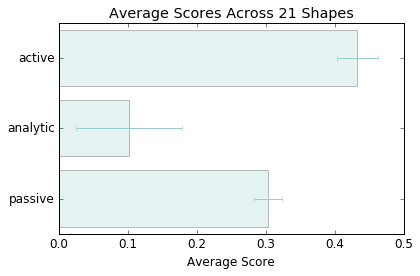

In [458]:
num_shapes = 21
# scores_open = []
scores_hold = []
scores_tens = []
scores_anal = []

for i in range(1, num_shapes+1):
    filename = 'pts_%d' %(i)
    filepath = dir_data + filename
    # open loop
    d = pickle.load(open(filepath+"/noholds", "rb"))
    score_open = np.mean(d['scores']) + 0.0
    # passive grasping
    d = pickle.load(open(filepath+"/holds", "rb"))
    scores_hold = scores_hold + [(x - score_open) / (abs(score_open)) for x in d['scores']]
    # analytic tensioning
    d = pickle.load(open(dir_data + "all_pts_policy/analytic21.p", "rb"))
    if 'pts_%d.p' %(i) in d.keys():
        scores_anal = scores_anal + [(x - score_open) / (abs(score_open)) for x in d['pts_%d.p' %(i)]]
    # active tensioning
    d = pickle.load(open(dir_data + "all_pts_policy/data.p", "rb"))
    scores_tens = scores_tens + [(x - score_open) / (abs(score_open)) for x in d[i-1]]

# Visualize in a bar graph
modes = ['passive', 'analytic', 'active']
y_pos = np.arange(len(modes))
scores = [np.mean(scores_hold), np.mean(scores_anal), np.mean(scores_tens)]
error = [2*stats.sem(scores_hold), 2*stats.sem(scores_anal), 2*stats.sem(scores_tens)]

print scores, error

plt.barh(y_pos, scores, xerr=error, align='center', alpha=0.25, color=colors[6], ecolor=colors[6])
plt.yticks(y_pos, modes)
plt.xlabel('Average Score')
plt.title('Average Scores Across 21 Shapes')


plt.savefig(dir_figs+'avg_scores_bar'+'.svg', format='svg', facecolor='w', edgecolor='w')
plt.savefig(dir_figs+'avg_scores_bar'+'.png', format='png', facecolor='w', edgecolor='w')
plt.show()


## Material Properties Experiment

##### Varying mass and visualizing the score for 1) open loop cutting, 2) cutting with passive grasping, 3a) cutting with active tensioning (policy 1), and 3b) cutting with active tensioning (policy 2)

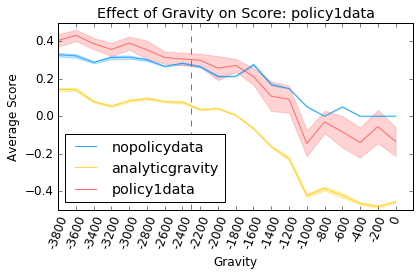

In [445]:
# totalpts = 40.0
scores = []
errors = []
filename = 'gravity_exp'
filenames = ['nopolicydata', 'analyticgravity', 'policy1data']

base_scores = []
filepath = dir_data + 'gravity_exp' + '/' + 'nograspdata.p'
d = pickle.load(open(filepath, "rb"))
for g in sorted(d.keys()):
    data = d[g]
    base_scores.append(np.mean(data))

k = 1
for f in filenames:
    
    filepath = dir_data + filename + '/' + f + '.p'
    d = pickle.load(open(filepath, "rb"))
    g_scores = []
    g_errors = []
    i = 0
    for g in sorted(d.keys())[:20]:
        data = d[g]
        base_score = base_scores[i] + 0.0
        g_scores.append(np.mean([(x - base_score) / (abs(base_score)) for x in data]))
        g_errors.append(2*stats.sem([(x - base_score) / (abs(base_score)) for x in data]))
        i = i+1
    scores.append(g_scores)
    errors.append(g_errors)

    xticks = sorted(d.keys())[:20]
    x_pos = 2*np.arange(len(xticks))
    plt.plot(x_pos, g_scores, label=f, alpha=0.8, color=colors[k])
    plt.fill_between(x_pos, np.array(g_scores)-np.array(g_errors), np.array(g_scores)+np.array(g_errors), alpha=0.25, facecolor=colors[k], edgecolor=colors[k])#, edgecolor='#CC4F1B', facecolor='#FF9848')
    k = k+1
    plt.hold(True)
plt.ylim((-0.5,0.5))
plt.legend(loc="lower left")
plt.axvline(x=15.,color=colors[8],ls='dashed')
plt.xticks(x_pos, xticks, rotation=70)
plt.xlabel('Gravity')
plt.ylabel('Average Score')
plt.title('Effect of Gravity on Score: %s' %(f))
plt.savefig(dir_figs+filename+'_scat'+'.svg', format='svg', facecolor='w', edgecolor='w')
plt.savefig(dir_figs+filename+'_scat'+'.png', format='png', facecolor='w', edgecolor='w')
plt.show()



# Resolution Experiment

##### The effect of varying cloth resolution $\{25, 100, 400, 625, 2500 \} $ points on policies tested on cloths with resolution $\{625, 2500\}$  points

Testing on the 625 point environment

[-0.79625984251968507, -0.21062992125984259, -0.15846456692913391, -0.055118110236220541] [0.17797157860796209, 0.090017063725157581, 0.078852173166680722, 0.068304533751564853]


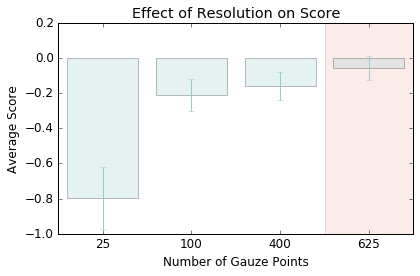

In [457]:
totalpts = 60.0
filename = 'resolution_exp'
filepath = dir_data + filename
scores = []
error = []
# 625 metric
base_score = np.mean(pickle.load(open(filepath+'/test5.p', "rb")))
for i in range(1, 5):
    d = pickle.load(open(filepath+'/test%d.p'%(i), "rb"))
    scores.append(np.mean([(x - base_score) / (abs(base_score)) for x in d]))
    error.append(2*stats.sem([(x - base_score) / (abs(base_score)) for x in d]))
# Visualize as a bar graph
res = [25, 100, 400, 625]
x_pos = np.arange(len(res))
plt.axvspan(2.5, 3.5, facecolor=colors[8], alpha=0.1)
plt.bar(x_pos, scores, yerr=error, align='center', alpha=0.25, color=colors[6], ecolor=colors[6])
plt.xticks(x_pos, res)
plt.ylim((-1.0,0.2))
plt.xlabel('Number of Gauze Points')
plt.ylabel('Average Score')
plt.title('Effect of Resolution on Score')

print scores, error
plt.savefig(dir_figs+filename+'_625'+'.svg', format='svg', facecolor='w', edgecolor='w')
plt.savefig(dir_figs+filename+'_625'+'.png', format='png', facecolor='w', edgecolor='w')
plt.show()

Testing on the 2500 point environment

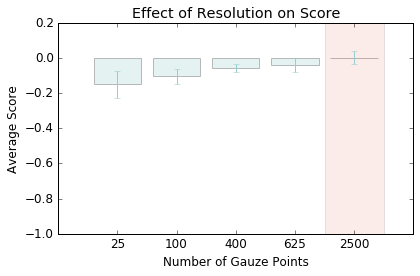

In [345]:
totalpts = 235.0
filename = 'resolution_exp'
filepath = dir_data + filename
scores = []
error = []
# 2500 metric
base_score = np.mean(pickle.load(open(filepath+'/test5_5.p', "rb")))
for i in range(1, 6):
    d = pickle.load(open(filepath+'/test5_%d.p'%(i), "rb"))
    scores.append(np.mean([(x - base_score) / (abs(base_score)) for x in d]))
    error.append(2*stats.sem([(x - base_score) / (abs(base_score)) for x in d]))
# Visualize as a bar graph
res = [25, 100, 400, 625, 2500]
x_pos = np.arange(len(res))
plt.axvspan(3.5, 4.5, facecolor=colors[8], alpha=0.1)
plt.bar(x_pos, scores, yerr=error, align='center', alpha=0.25, color=colors[6], ecolor=colors[6])
plt.xticks(x_pos, res)
plt.ylim(-1.0, 0.2)
plt.xlabel('Number of Gauze Points')
plt.ylabel('Average Score')
plt.title('Effect of Resolution on Score')

plt.savefig(dir_figs+filename+'_2500'+'.svg', format='svg', facecolor='w', edgecolor='w')
plt.savefig(dir_figs+filename+'_2500'+'.png', format='png', facecolor='w', edgecolor='w')

plt.show()

# Process Noise Experiment

##### The effect of noise for 1) open loop cutting, 2) cutting with passive grasping, 3a) cutting with active tensioning (policy 1), and 3b) cutting with active tensioning (policy 2)

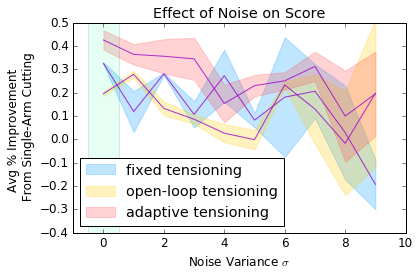

In [493]:
scores = []
errors = []
filename = 'noise_exp'
filenames = ['nopolicy', 'test1']

base_scores = []
filepath = dir_data + filename + '/' + 'noisedatafile2.p'
d = pickle.load(open(filepath, "rb"))
d_base = d['noisenograsp']
d_hold = d['noisenopolicy']
d_tens = d['noisepolicy']
d_anal = pickle.load(open(dir_data + filename + '/' + 'analytic_noise.p'))

for i in range(len(d_base)):
    base_scores.append(np.mean(d_base[i])+0.0)
n_scores = []
n_errors = []
for i in range(len(d_hold)):
    n_scores.append(np.mean([(x - base_scores[i]) / abs(base_scores[i]) for x in d_hold[i]]))
    n_errors.append(2*stats.sem([(x - base_scores[i]) / abs(base_scores[i]) for x in d_hold[i]]))
scores.append(n_scores)
errors.append(n_errors)
n_scores = []
n_errors = []
for i in range(len(d_anal)):
    n_scores.append(np.mean([(x - base_scores[i]) / abs(base_scores[i]) for x in d_anal[i]]))
    n_errors.append(2*stats.sem([(x - base_scores[i]) / abs(base_scores[i]) for x in d_anal[i]]))
scores.append(n_scores)
errors.append(n_errors)
n_scores = []
n_errors = []
for i in range(len(d_tens)):
    n_scores.append(np.mean([(x - base_scores[i]) / abs(base_scores[i]) for x in d_tens[i]]))
    n_errors.append(2*stats.sem([(x - base_scores[i]) / abs(base_scores[i]) for x in d_tens[i]]))
scores.append(n_scores)
errors.append(n_errors)

bar_width = 0.3
plt.axvspan(-0.5, 0.5, facecolor=colors[0], alpha=0.1)
# plt.bar(np.arange(10) - bar_width, scores[0], bar_width, yerr=errors[0], align='center', alpha=0.25, color=colors[1], ecolor=colors[1], label="passive grasping")
# plt.bar(np.arange(10), scores[1], bar_width, yerr=errors[1], align='center', alpha=0.25, color=colors[2], ecolor=colors[2], label="analytic tensioning")
# plt.bar(np.arange(10)+bar_width, scores[2], bar_width, yerr=errors[2], align='center', alpha=0.25, color=colors[3], ecolor=colors[3], label="active tensioning")
plt.plot(np.arange(10), scores[0], alpha=0.8, color=colors[k])
plt.fill_between(np.arange(10), scores[0]-np.array(errors[0]), np.array(scores[0])+np.array(errors[0]), alpha=0.25, facecolor=colors[1], edgecolor=colors[1], label="fixed tensioning")#, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.plot(np.arange(10), scores[1], alpha=0.8, color=colors[k])
plt.fill_between(np.arange(10), scores[1]-np.array(errors[1]), np.array(scores[1])+np.array(errors[1]), alpha=0.25, facecolor=colors[2], edgecolor=colors[2], label="open-loop tensioning")#, edgecolor='#CC4F1B', facecolo
plt.plot(np.arange(10), scores[2], alpha=0.8, color=colors[k])
plt.fill_between(np.arange(10), scores[2]-np.array(errors[2]), np.array(scores[2])+np.array(errors[2]), alpha=0.25, facecolor=colors[3], edgecolor=colors[3], label="adaptive tensioning")#, edgecolor='#CC4F1B', facecolo
plt.ylim((-0.4,0.5))
plt.xlim((-1, 10))
plt.xlabel('Noise Variance $\sigma$')
plt.ylabel('Avg % Improvement \n From Single-Arm Cutting')
plt.title('Effect of Noise on Score')
plt.legend(loc='lower left')
plt.savefig(dir_figs+filename+f+'_bar'+'.svg', format='svg', facecolor='w', edgecolor='w')
plt.savefig(dir_figs+filename+f+'_bar'+'.png', format='png', facecolor='w', edgecolor='w')
plt.show()


# Pin Experiment

##### The effect of different pin locations on scores after active tensioning is applied (policies learned for each of the 85 pin points)

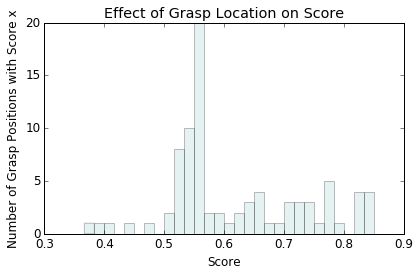

In [248]:
totalpts = 60.0
filename = 'pin_exp'
filepath = dir_data + filename
d = pickle.load(open(filepath+'/data.p', "rb"))
plt.hist([x / (totalpts) for x in d], bins=(max(d)-min(d)), alpha=0.25, color=colors[6])
plt.xlabel('Score')
plt.ylabel('Number of Grasp Positions with Score x')
plt.title('Effect of Grasp Location on Score')

plt.savefig(dir_figs+filename+'.svg', format='svg', facecolor='w', edgecolor='w')
plt.show()

## Difference in error pre and post ordering

##### Visualize difference in error before and after brute force search for a good ordering for 1) open loop cutting, 2) cutting with passive grasping, and 3) cutting with active tensioning